<a href="https://colab.research.google.com/github/arthisri14/Autonomous-Taxi-AI-Agent/blob/main/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
! pip install pygame

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

d = Display()
d.start()

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 1
Score: -743
Episode: 2
Score: -722
Episode: 3
Score: -722
Episode: 4
Score: -803
Episode: 5
Score: -713
Episode: 6
Score: -785
Episode: 7
Score: -740
Episode: 8
Score: -331
Episode: 9
Score: -713
Episode: 10
Score: -641


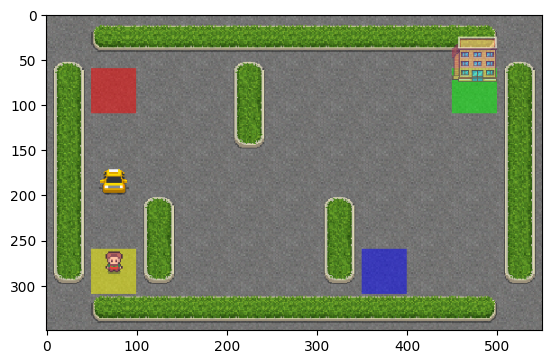

In [ ]:
episodes = 10
scores = []  # List to store scores for each episode

for episode in range(1, episodes + 1):  # Change range to include the last episode
    state = env.reset()
    done = False
    score = 0
    prev_screen = env.render(mode='rgb_array')
    plt.imshow(prev_screen)
    img = []

    while not done:
        next_state, reward, done, info = env.step(env.action_space.sample())
        score += reward
        img.append(env.render('rgb_array'))  # Capture the frame

    scores.append(score)  # Store the score for this episode
    print('Episode: {}\nScore: {}'.format(episode, score))  # Print score for each episode

In [ ]:
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

In [ ]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = .1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []


In [ ]:
import logging

# Configure the logging module
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Training the agent with logging and monitoring
for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_cur_episode = 0

    for step in range(max_steps_per_episode):
        exploration_threshold = np.random.uniform(0, 1)

        if exploration_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()

        next_state, reward, done, info = env.step(action)

        # Update Q-table (example logic; adjust as needed)
        q_table[state, action] += learning_rate * (reward + discount_rate * np.max(q_table[next_state, :]) - q_table[state, action])

        # Log the current episode and step information
        logging.info(f'Episode: {episode}, Step: {step}, State: {state}, Action: {action}, Reward: {reward}, Exploration Rate: {exploration_rate}')

        # Update current state and rewards
        state = next_state
        rewards_cur_episode += reward

        if done:
            break

    # Decay exploration rate over time
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [ ]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.93716012,   2.95907444,  -2.91739423,   0.98818232,
          9.6220697 ,  -9.19842373],
       [  0.93045117,   4.24922173,   2.27323557,   6.41451108,
         14.11880599,  -2.63609991],
       ...,
       [ -0.35728983,   9.03318165,  -0.19213861,  -1.01983813,
         -4.07919866,  -6.17547027],
       [ -2.92199303,  -2.23422817,  -2.94715366,  -2.9004391 ,
        -10.03535762,  -9.37546272],
       [  2.62780165,   1.88922044,   0.44139206,  18.52966298,
          1.79236624,   0.04043549]])

In [ ]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000


Average per thousand episodes
1000 :  -248.35900000000012
2000 :  -34.64599999999997
3000 :  2.4459999999999926
4000 :  5.742999999999971
5000 :  6.913999999999965
6000 :  7.231999999999964
7000 :  7.4879999999999605
8000 :  7.254999999999964
9000 :  7.379999999999953
10000 :  7.604999999999959


step:  10  reward:  20
******Reached Goal******


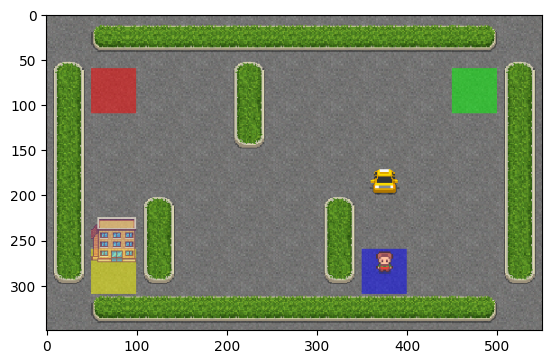

In [ ]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)


    if done:
      #display.clear_output(wait=True)
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()

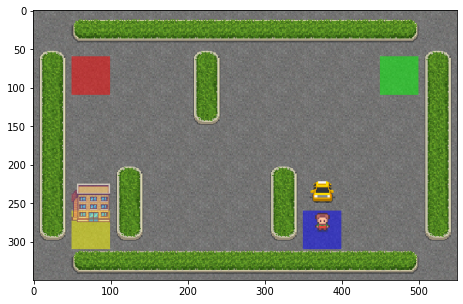

In [ ]:
dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))

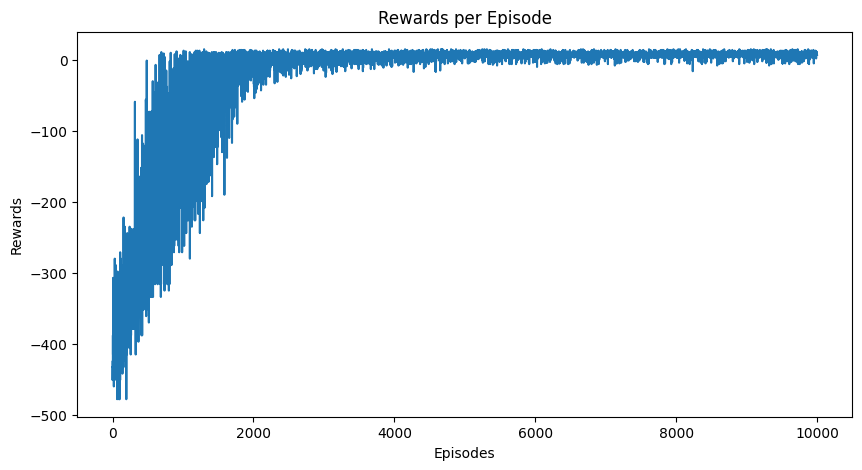

In [ ]:
plt.ion()  # Turn on interactive mode
plt.figure(figsize=(10,5))

# After training loop
plt.plot(rewards_all_episodes)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Rewards per Episode')
plt.show()